In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/company-reviews-cleaned-dataset/sg_companies_reviews_clean.csv


In [2]:
company_reviews = pd.read_csv('/kaggle/input/company-reviews-cleaned-dataset/sg_companies_reviews_clean.csv')

In [3]:
company_reviews.head()

,Company Name,Overall Rating,Review Date,Review Title,Job Title,Job Details,Location,Pros,Cons
0,Amazon,5,2024-02-12,good pay hard work,area manager ii,former employee more than 3 years,"Romulus, MI",pay autonomy plenty of benefits,it was hard work in a warehouse many days of 1...
1,Amazon,5,2016-01-10,you get what you put in,anonymous employee,current employee,"Seattle, WA",really smart people a lot of opportunity for g...,you have to be self motivated no one will hold...
2,Amazon,3,2016-02-20,exciting work abusive culture,senior engineering manager,current employee more than 8 years,"Seattle, WA",jeff bezos and his steam are brilliant and con...,the management process is abusive and im curre...
3,Amazon,4,2013-12-17,can be amazing for some people horrible for ot...,software development manager,current employee more than 3 years,"Seattle, WA",amazon is doing lots of cool stuffbut lots of ...,youre responsible for your own career progress...
4,Amazon,5,2018-02-23,an amazing place to work,software development manager,current employee less than 1 year,"Phoenix, AZ",ive been at amazon for a month now and ive see...,no cons so far seriously like i said im sure a...


In [4]:
company_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10035 entries, 0 to 10034
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Company Name    10035 non-null  object
 1   Overall Rating  10035 non-null  int64 
 2   Review Date     10035 non-null  object
 3   Review Title    9924 non-null   object
 4   Job Title       10030 non-null  object
 5   Job Details     10035 non-null  object
 6   Location        7272 non-null   object
 7   Pros            9626 non-null   object
 8   Cons            9724 non-null   object
dtypes: int64(1), object(8)
memory usage: 705.7+ KB


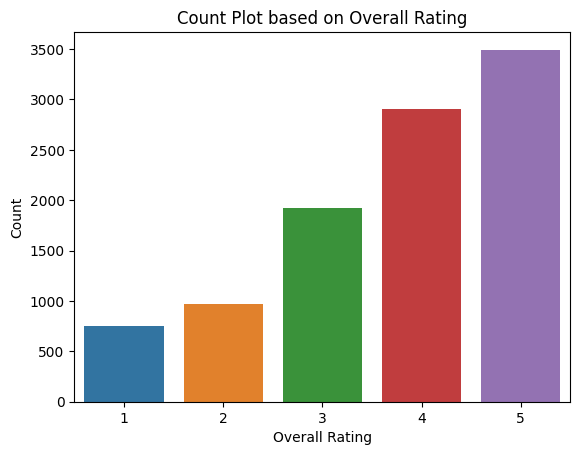

In [5]:
# Create count plot
sns.countplot(x='Overall Rating', data=company_reviews)

# Show plot
plt.title('Count Plot based on Overall Rating')
plt.xlabel('Overall Rating')
plt.ylabel('Count')
plt.show()

### Prepare evaluation data:

1. Drop rows with nans
2. Drop duplicates
3. Ensure a relatively balanced dataset - got both positive and negative reviews

In [6]:
# Drop rows with NaN values
company_reviews_no_nans = company_reviews.dropna()

company_reviews_no_nans

,Company Name,Overall Rating,Review Date,Review Title,Job Title,Job Details,Location,Pros,Cons
0,Amazon,5,2024-02-12,good pay hard work,area manager ii,former employee more than 3 years,"Romulus, MI",pay autonomy plenty of benefits,it was hard work in a warehouse many days of 1...
1,Amazon,5,2016-01-10,you get what you put in,anonymous employee,current employee,"Seattle, WA",really smart people a lot of opportunity for g...,you have to be self motivated no one will hold...
2,Amazon,3,2016-02-20,exciting work abusive culture,senior engineering manager,current employee more than 8 years,"Seattle, WA",jeff bezos and his steam are brilliant and con...,the management process is abusive and im curre...
3,Amazon,4,2013-12-17,can be amazing for some people horrible for ot...,software development manager,current employee more than 3 years,"Seattle, WA",amazon is doing lots of cool stuffbut lots of ...,youre responsible for your own career progress...
4,Amazon,5,2018-02-23,an amazing place to work,software development manager,current employee less than 1 year,"Phoenix, AZ",ive been at amazon for a month now and ive see...,no cons so far seriously like i said im sure a...
...,...,...,...,...,...,...,...,...,...
10029,NCR,1,2024-01-03,could be better,call center agent,former employee more than 1 year,"USAF Academy, CO",there are no pros at all,everything especially management terrible plac...
10030,NCR,4,2023-10-16,good but could be better,customer engineer,former employee more than 1 year,"Miami, FL",management was good solid training opportuniti...,inconsistent schedule growth within the compan...
10031,NCR,5,2023-10-23,great starting position,sr software support engineer,former employee,"Atlanta, GA",learn a lot develop skills,there was a lot of overtime
10032,NCR,4,2023-08-05,great company on call rotation,atm technician,former employee more than 1 year,"Springfield, MO",great company provided a vehicle and covered g...,lots of travel and rotating on call very littl...


In [7]:
# Drop duplicate rows
company_reviews_no_nans.drop_duplicates(inplace=True)

/tmp/ipykernel_18/1418166625.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_reviews_no_nans.drop_duplicates(inplace=True)


In [8]:
company_reviews_no_nans

,Company Name,Overall Rating,Review Date,Review Title,Job Title,Job Details,Location,Pros,Cons
0,Amazon,5,2024-02-12,good pay hard work,area manager ii,former employee more than 3 years,"Romulus, MI",pay autonomy plenty of benefits,it was hard work in a warehouse many days of 1...
1,Amazon,5,2016-01-10,you get what you put in,anonymous employee,current employee,"Seattle, WA",really smart people a lot of opportunity for g...,you have to be self motivated no one will hold...
2,Amazon,3,2016-02-20,exciting work abusive culture,senior engineering manager,current employee more than 8 years,"Seattle, WA",jeff bezos and his steam are brilliant and con...,the management process is abusive and im curre...
3,Amazon,4,2013-12-17,can be amazing for some people horrible for ot...,software development manager,current employee more than 3 years,"Seattle, WA",amazon is doing lots of cool stuffbut lots of ...,youre responsible for your own career progress...
4,Amazon,5,2018-02-23,an amazing place to work,software development manager,current employee less than 1 year,"Phoenix, AZ",ive been at amazon for a month now and ive see...,no cons so far seriously like i said im sure a...
...,...,...,...,...,...,...,...,...,...
10029,NCR,1,2024-01-03,could be better,call center agent,former employee more than 1 year,"USAF Academy, CO",there are no pros at all,everything especially management terrible plac...
10030,NCR,4,2023-10-16,good but could be better,customer engineer,former employee more than 1 year,"Miami, FL",management was good solid training opportuniti...,inconsistent schedule growth within the compan...
10031,NCR,5,2023-10-23,great starting position,sr software support engineer,former employee,"Atlanta, GA",learn a lot develop skills,there was a lot of overtime
10032,NCR,4,2023-08-05,great company on call rotation,atm technician,former employee more than 1 year,"Springfield, MO",great company provided a vehicle and covered g...,lots of travel and rotating on call very littl...


In [9]:
company_reviews_no_nans['Company Name'].value_counts()

Company Name
Rakuten                      90
EPAM Systems                 87
NCR                          82
Infosys                      79
VMware                       77
                             ..
Tata Consultancy Services    38
Grab                         36
Shopee                       30
DONE by NONE                 27
NCS                          27
Name: count, Length: 101, dtype: int64

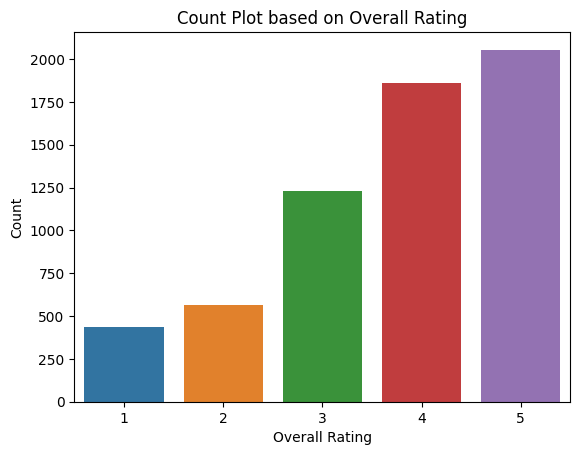

In [10]:
# Create count plot
sns.countplot(x='Overall Rating', data=company_reviews_no_nans)

# Show plot
plt.title('Count Plot based on Overall Rating')
plt.xlabel('Overall Rating')
plt.ylabel('Count')
plt.show()

Analysis: Mostly positive reviews than negative reviews

In [11]:
# Set random seed for reproducibility
np.random.seed(123)

In [12]:
# Split DataFrame based on overall ratings
low_ratings1 = company_reviews_no_nans[company_reviews_no_nans['Overall Rating'] == 1]
low_ratings2 = company_reviews_no_nans[company_reviews_no_nans['Overall Rating'] == 2]
high_rating = company_reviews_no_nans[company_reviews_no_nans['Overall Rating'] == 5]


# Sample from low ratings and high rating data
low1_samples = low_ratings1.sample(n=400)
low2_samples = low_ratings2.sample(n=200)
high_samples = high_rating.sample(n=600)

# Concatenate the sampled subsets
evaluation_data = pd.concat([low1_samples, low2_samples, high_samples])

evaluation_data

,Company Name,Overall Rating,Review Date,Review Title,Job Title,Job Details,Location,Pros,Cons
519,Shopee,1,2023-02-08,terrible company,business development associate,former employee more than 1 year,"Poland, ME",salary and benefits nothing else to add,management overtime no dvelopement opportunities
7250,Western Digital,1,2023-11-15,yuk,account manager,former employee,"San Jose, CA",i was able to quit,the entire management team sucks
4129,Genpact,1,2023-12-11,please stay away unless no other choice,process agent,former employee more than 3 years,"Richardson, TX",if you happen to get a good manager they will ...,they will try to milk every ounce of productio...
5544,Equinix,1,2023-07-23,toxic management toxic company,director,former employee,"Redwood City, CA",the data center side of the business is well run,toxic and abusive management hr team beholden ...
4710,FDM Group,1,2023-11-23,awful,consultant,former employee more than 1 year,"New York, NY",none avoid this company for your health and pe...,everything is wrong here the business model on...
...,...,...,...,...,...,...,...,...,...
4977,EPAM Systems,5,2024-01-31,awesome client work,designer,current employee more than 3 years,"Philadelphia, PA",opportunity to work on a variety of great clients,project length can vary so shorter term intera...
5943,NEC Corporation,5,2016-01-15,efficient and effective,regional sales manager,current employee less than 1 year,"Saddle Brook, NJ",complete transparency for all those involved i...,due to the small size of the company there is ...
1169,Micron Technology,5,2023-12-17,great workplace,staff engineer,current employee more than 3 years,Hyderābād,very good work environment and great organizat...,always they are future focused actually this i...
9879,SAS,5,2023-08-30,excellent company to work for with a great out...,advisory data scientist,current employee more than 10 years,"Cary, NC",management seems to genuinely care about balan...,none from my pov had one manager who was a bit...


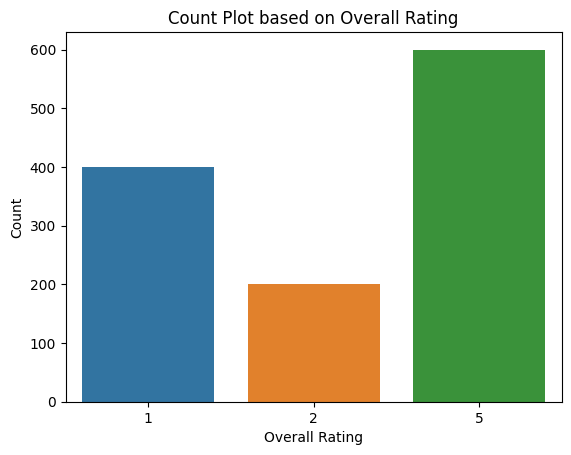

In [13]:
# Create count plot
sns.countplot(x='Overall Rating', data=evaluation_data)

# Show plot
plt.title('Count Plot based on Overall Rating')
plt.xlabel('Overall Rating')
plt.ylabel('Count')
plt.show()

### Create field for review:

1. Review Title + Pros + Cons
2. Pros + Cons

Run our models on each of them

In [14]:
evaluation_data['Overall Review'] = evaluation_data['Pros'] + ' '+ evaluation_data['Cons']
evaluation_data['Overall Review with Title'] = evaluation_data['Review Title'] + ' // '+ evaluation_data['Pros'] + ' '+ evaluation_data['Cons']

In [15]:
evaluation_data

,Company Name,Overall Rating,Review Date,Review Title,Job Title,Job Details,Location,Pros,Cons,Overall Review,Overall Review with Title
519,Shopee,1,2023-02-08,terrible company,business development associate,former employee more than 1 year,"Poland, ME",salary and benefits nothing else to add,management overtime no dvelopement opportunities,salary and benefits nothing else to add manage...,terrible company // salary and benefits nothin...
7250,Western Digital,1,2023-11-15,yuk,account manager,former employee,"San Jose, CA",i was able to quit,the entire management team sucks,i was able to quit the entire management team ...,yuk // i was able to quit the entire managemen...
4129,Genpact,1,2023-12-11,please stay away unless no other choice,process agent,former employee more than 3 years,"Richardson, TX",if you happen to get a good manager they will ...,they will try to milk every ounce of productio...,if you happen to get a good manager they will ...,please stay away unless no other choice // if ...
5544,Equinix,1,2023-07-23,toxic management toxic company,director,former employee,"Redwood City, CA",the data center side of the business is well run,toxic and abusive management hr team beholden ...,the data center side of the business is well r...,toxic management toxic company // the data cen...
4710,FDM Group,1,2023-11-23,awful,consultant,former employee more than 1 year,"New York, NY",none avoid this company for your health and pe...,everything is wrong here the business model on...,none avoid this company for your health and pe...,awful // none avoid this company for your heal...
...,...,...,...,...,...,...,...,...,...,...,...
4977,EPAM Systems,5,2024-01-31,awesome client work,designer,current employee more than 3 years,"Philadelphia, PA",opportunity to work on a variety of great clients,project length can vary so shorter term intera...,opportunity to work on a variety of great clie...,awesome client work // opportunity to work on ...
5943,NEC Corporation,5,2016-01-15,efficient and effective,regional sales manager,current employee less than 1 year,"Saddle Brook, NJ",complete transparency for all those involved i...,due to the small size of the company there is ...,complete transparency for all those involved i...,efficient and effective // complete transparen...
1169,Micron Technology,5,2023-12-17,great workplace,staff engineer,current employee more than 3 years,Hyderābād,very good work environment and great organizat...,always they are future focused actually this i...,very good work environment and great organizat...,great workplace // very good work environment ...
9879,SAS,5,2023-08-30,excellent company to work for with a great out...,advisory data scientist,current employee more than 10 years,"Cary, NC",management seems to genuinely care about balan...,none from my pov had one manager who was a bit...,management seems to genuinely care about balan...,excellent company to work for with a great out...


In [16]:
### Create Label: Overall Rating 1 and 2 as Negative, Overall Rating 5 as positive
# Create a new column based on the classification of ratings
evaluation_data['Sentiment'] = evaluation_data['Overall Rating'].apply(lambda x: 'Negative' if x in [1, 2] else 'Positive')

evaluation_data

,Company Name,Overall Rating,Review Date,Review Title,Job Title,Job Details,Location,Pros,Cons,Overall Review,Overall Review with Title,Sentiment
519,Shopee,1,2023-02-08,terrible company,business development associate,former employee more than 1 year,"Poland, ME",salary and benefits nothing else to add,management overtime no dvelopement opportunities,salary and benefits nothing else to add manage...,terrible company // salary and benefits nothin...,Negative
7250,Western Digital,1,2023-11-15,yuk,account manager,former employee,"San Jose, CA",i was able to quit,the entire management team sucks,i was able to quit the entire management team ...,yuk // i was able to quit the entire managemen...,Negative
4129,Genpact,1,2023-12-11,please stay away unless no other choice,process agent,former employee more than 3 years,"Richardson, TX",if you happen to get a good manager they will ...,they will try to milk every ounce of productio...,if you happen to get a good manager they will ...,please stay away unless no other choice // if ...,Negative
5544,Equinix,1,2023-07-23,toxic management toxic company,director,former employee,"Redwood City, CA",the data center side of the business is well run,toxic and abusive management hr team beholden ...,the data center side of the business is well r...,toxic management toxic company // the data cen...,Negative
4710,FDM Group,1,2023-11-23,awful,consultant,former employee more than 1 year,"New York, NY",none avoid this company for your health and pe...,everything is wrong here the business model on...,none avoid this company for your health and pe...,awful // none avoid this company for your heal...,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...
4977,EPAM Systems,5,2024-01-31,awesome client work,designer,current employee more than 3 years,"Philadelphia, PA",opportunity to work on a variety of great clients,project length can vary so shorter term intera...,opportunity to work on a variety of great clie...,awesome client work // opportunity to work on ...,Positive
5943,NEC Corporation,5,2016-01-15,efficient and effective,regional sales manager,current employee less than 1 year,"Saddle Brook, NJ",complete transparency for all those involved i...,due to the small size of the company there is ...,complete transparency for all those involved i...,efficient and effective // complete transparen...,Positive
1169,Micron Technology,5,2023-12-17,great workplace,staff engineer,current employee more than 3 years,Hyderābād,very good work environment and great organizat...,always they are future focused actually this i...,very good work environment and great organizat...,great workplace // very good work environment ...,Positive
9879,SAS,5,2023-08-30,excellent company to work for with a great out...,advisory data scientist,current employee more than 10 years,"Cary, NC",management seems to genuinely care about balan...,none from my pov had one manager who was a bit...,management seems to genuinely care about balan...,excellent company to work for with a great out...,Positive


In [17]:
evaluation_data['Sentiment'].value_counts()

Sentiment
Negative    600
Positive    600
Name: count, dtype: int64

In [18]:
evaluation_data['Company Name'].value_counts()

Company Name
Rakuten         28
X               24
Netflix         22
Gemalto         21
Lenovo          20
                ..
Shopee           6
Amazon           5
Google           5
Meltwater        5
DONE by NONE     4
Name: count, Length: 101, dtype: int64

In [19]:
### Save evaluation data
evaluation_data.to_csv('evaluation_data_raw.csv',index=False)